In [1]:
#Implementing PCA from scratch

In [2]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()
X = iris.data
y = iris.target

#PCA is for the unsupervised data, we are just using iris dataset just for understanding the computation steps in PCA

In [28]:
#Computing the covariance of the X data
X_cov_numpy = np.cov(X.transpose()) 

#finding the mean of individual features
X_features_mean = np.mean(X,axis=0)

#X - X mean
X_mean_difference = X - X_features_mean

#Covariance
X_cov =  (np.dot(X_mean_difference.T,X_mean_difference)) / (X.shape[0] - 1)


In [32]:
X_cov 

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [30]:
X_cov_numpy

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [54]:
eigenvalues, eigenvectors = np.linalg.eig(X_cov)

In [55]:
eigenvalues, eigenvectors

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [59]:
#Sorting in descending order the eigen values::
eigenvalues_sorted_descending_indx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[eigenvalues_sorted_descending_indx]
eigenvectors = eigenvectors[:, eigenvalues_sorted_descending_indx]

In [60]:
#After sorting them in descending order to get the Principle components with highest variance
eigenvalues, eigenvectors

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

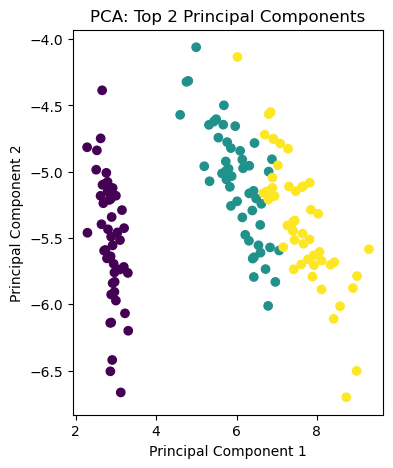

In [64]:
top_eigenvectors = eigenvectors[:, :2]

# Project the data onto the top two eigenvectors
projected_data = np.dot(X, top_eigenvectors)

# Plot the projected data
plt.figure(figsize=(4, 5))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Top 2 Principal Components')
plt.show()